In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [29]:
mg_ml = pd.read_csv('mg_ml_rescaled.csv')

In [30]:
mg_ml = mg_ml.drop(columns=list(mg_ml.columns)[0], axis=1)

In [31]:
Y = mg_ml['default_status']
X = mg_ml.drop(columns=['default_status'], axis=1)

## Modeling 

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Stratified split of the train and test set with train-test ratio of 7.5:2.5
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, 
                                            stratify=Y, random_state=10)

In [33]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

# See the inital model performance
clf = LogisticRegression()
clf.fit(X_train, Y_train)
print('Acc:', cross_val_score(clf, X_train, Y_train, 
                              cv=StratifiedKFold(n_splits=5), 
                              scoring='accuracy').mean())
print('F1:', cross_val_score(clf, X_train, Y_train, 
                             cv=StratifiedKFold(n_splits=5), 
                             scoring='f1').mean())
print('ROC AUC:', cross_val_score(clf, X_train, Y_train, 
                                  cv=StratifiedKFold(n_splits=5), 
                                  scoring='roc_auc').mean())

Acc: 0.7119733333333333
F1: 0.37970981643935403
ROC AUC: 0.7397222331407088


## Fine Tune using F1

In [34]:
#Grid Search
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
params = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
clf = GridSearchCV(clf, param_grid = params,scoring = ['accuracy','f1','roc_auc'],refit='f1',return_train_score=True)
clf.fit(X_train, Y_train)
print(clf.best_params_)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             refit='f1', return_train_score=True,
             scoring=['accuracy', 'f1', 'roc_auc'])

In [35]:
clf = LogisticRegression(**clf.best_params_)
clf.fit(X_train,Y_train)
#clf = LogisticRegression(C=10,penalty=l2)

{'C': 10, 'penalty': 'l2'}


## Train Set Performance

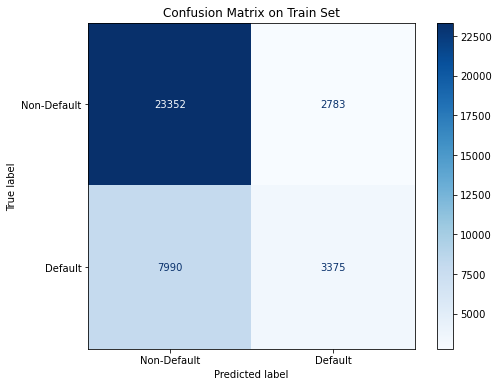

In [36]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve

fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(clf, X_train, Y_train, display_labels=['Non-Default', 'Default'], 
                      cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix on Train Set')
plt.show()

In [37]:
Y_train_pred = clf.predict(X_train)
Y_train_proba = clf.predict_proba(X_train)

print('Train Acc:', accuracy_score(Y_train, Y_train_pred))
print('Train F1:', f1_score(Y_train, Y_train_pred))
print('Train ROC AUC:', roc_auc_score(Y_train, Y_train_proba[:, 1]))

Train Acc: 0.71272
Train F1: 0.38520801232665647
Train ROC AUC: 0.7402540869765611


## Test Set Performance

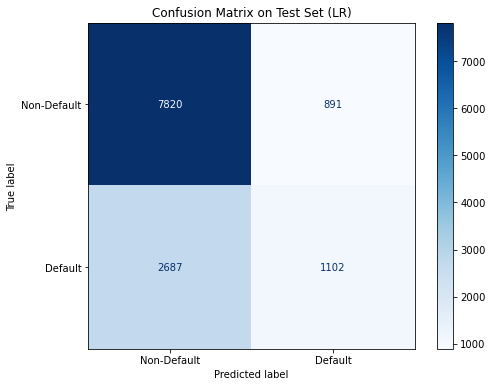

In [42]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve

fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(clf, X_test, Y_test, display_labels=['Non-Default', 'Default'], 
                      cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix on Test Set (LR)')
plt.show()

In [39]:
# Predict on the test set
Y_test_pred = clf.predict(X_test)
Y_test_proba = clf.predict_proba(X_test)

print('test Acc:', accuracy_score(Y_test, Y_test_pred))
print('test F1:', f1_score(Y_test, Y_test_pred))
print('test ROC AUC:', roc_auc_score(Y_test, Y_test_proba[:, 1]))

test Acc: 0.71376
test F1: 0.3811829816672431
test ROC AUC: 0.7443318072764937


## ROC AUC

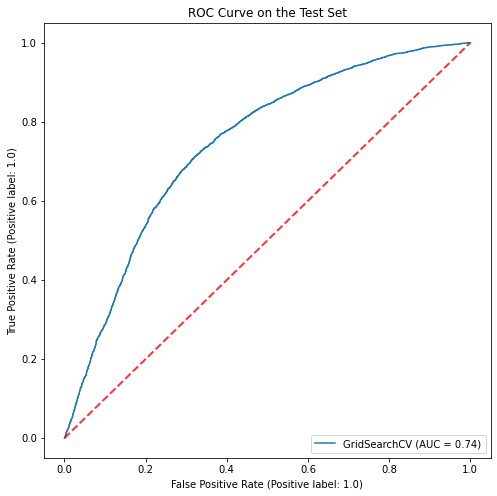

In [40]:
# ROC curve
fig, ax = plt.subplots(figsize=(8, 8))
plot_roc_curve(clf, X_test, Y_test, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
ax.set_title('ROC Curve on the Test Set')
plt.show()

In [41]:
clf

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             refit='f1', return_train_score=True,
             scoring=['accuracy', 'f1', 'roc_auc'])